# Глава 2
### Пример работы НС на 30 строк

In [16]:
from keras.datasets import mnist
from keras import models, layers
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 2 полносвязных слоя (Dense)
network = models.Sequential() # будет задана последовательность слоёв
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

# Оптимизатор = как сеть будет обновлять себя, опираясь на наблюдаемые данные
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

train_images = train_images.reshape((60000, 28*28))
# Переводим яркости пикселей из [0, 255] (uint8) в [0, 1] (float32).
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
# Переводим яркости пикселей из [0, 255] (uint8) в [0, 1] (float32).
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


network.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.2580 - accuracy: 0.9245
Epoch 2/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.1037 - accuracy: 0.9690
Epoch 3/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.0672 - accuracy: 0.9796
Epoch 4/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.0486 - accuracy: 0.9850
Epoch 5/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.0378 - accuracy: 0.9888


In [17]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test acc: ', test_acc)

10000/10000 [==============================] - 1s 73us/step
test acc:  0.9763000011444092


# Ранги матрицы

In [19]:
import numpy as np

# скаляр - нет осей
x = np.array(12)
x.ndim

0

In [20]:
# вектор - одна ось
x = np.array([12, 3, 6, 14])
x.ndim

1

In [21]:
# матрица - две оси - строки, столбцы
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

In [22]:
# матрица из матриц - трехмерный тензор
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

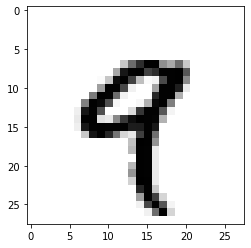

In [29]:
import matplotlib.pyplot as plt


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
def naive_relu(x):
    '''Реализация операции relu
    Эквивалентно операции z = np.maximum(z, 0.)
    '''
    
    assert len(x.shape) == 2
    
    x = x.copy()   # предотвратить затирание исходного тензора
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x


def naive_add(x, y):
    '''Реализация сложения векторов
    Эквивалентно операции z = x + y
    Тут решается вопрос, как сложить МАТРИЦУ и ВЕКТОР: 
    вектор дополняется до матрицы (добавляется новая ось=ранг_увеличивается_на_1)!
    '''
    
    assert len(x.shape) == 2   # убедиться, что x - двумерный тензор numpy
    assert len(y.shape) == 1   # убедиться, что y - вектор numpy
    assert x.shape[1] == y.shape[0]
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x



In [35]:
"""Тут производится поэлементная операция maximum 
к двум тензорам с разными форматами"""

# x = тензор формы (64, 3, 32, 10)
x = np.random.random((64, 3, 32, 10))
# y = вектор формы (32, 10)
y = np.random.random((32, 10))

# Получившийся тензор имеет 
z = np.maximum(x, y)

### Скалярное произведение тензоров

In [60]:
import numpy as np

x = np.array([1, 2, 3, 4])
y = np.array([5, 6, 7, 8])
z = np.dot(x, y)
z

70

In [61]:
def naive_vector_dot(x, y):
    """Реализация скалярного произведения двух векторов
    Векторы должны быть одинаковой размрерности
    """
    assert x.ndim == 1
    assert y.ndim == 1
    assert x.shape[0] == y.shape[0]
    
    z = 0.
    for i in range(x.shape[0]):
        # Пусть есть векторы: [1, 2, 3, 4] и [5, 6, 7, 8]
        # Тогда результат: 0 += 1*5 + 2*6 + 3*7 + 4*8, только в цикле
        z += x[i]*y[i]
    return z

In [62]:
naive_vector_dot(x, y)

70.0

In [70]:
import numpy as np

x = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8]])
y = np.array([9, 10, 11, 12])



def naive_matrix_vector_dot(x, y):
    """Скалярное произведение матрицы на вектор
    """
    
    assert x.ndim == 2
    assert y.ndim == 1
    # для перемножения матрицы на вектор первое измерение x должно совпадать с нулевым измерением y
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i,j] * y[j]
    return z

    
naive_matrix_vector_dot(x, y)

array([110., 278.])

In [72]:
import numpy as np


def naive_matrix_dot(x, y):
    """Скалярное произведение двух матриц
    """
    
    assert x.ndim == 2   # убедиться, что x - матрица
    assert y.ndim == 2
    assert x.shape[1] == x.shape[0] 
    
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

